In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from cdlib import algorithms
import random

In [16]:
# GRAPH CLUSTERING ILLUSTRATION
sizes = [11, 12, 14]
probs = [
    [0.95, 0.07, 0.05],  # Cluster 1
    [0.07, 0.95, 0.05],  # Cluster 2
    [0.05, 0.05, 0.95]  # Cluster 3
]
G = nx.stochastic_block_model(sizes, probs, seed=0)

pos = nx.spring_layout(G)

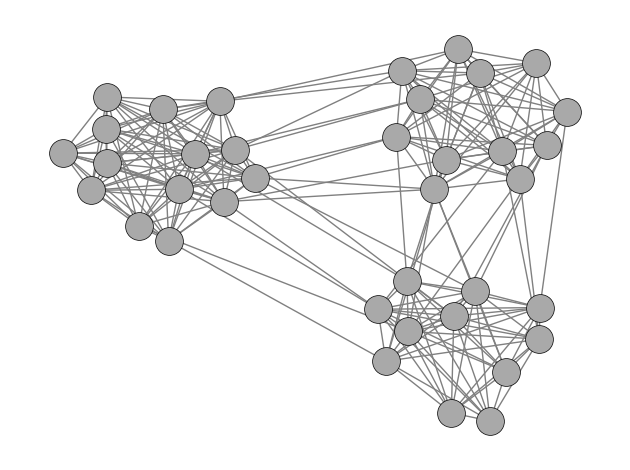

In [17]:
nodes = nx.draw_networkx_nodes(G, pos, node_color='darkgray', node_size=400)
nodes.set_edgecolor('black')
nodes.set_linewidth(.5)
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.tight_layout()
plt.axis("off")
plt.savefig("figures/clusters_before.png", transparent=True, dpi=300)

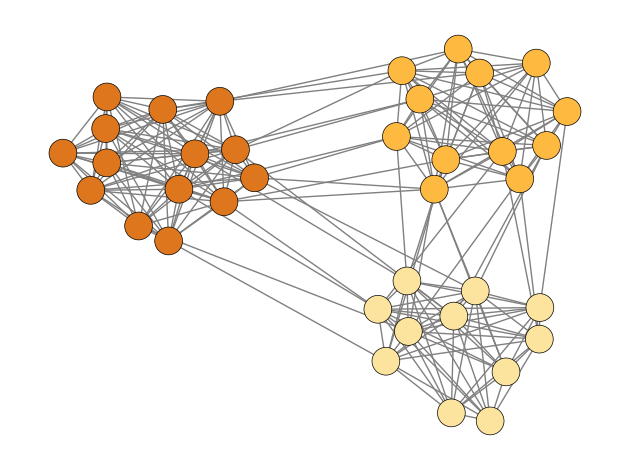

In [18]:
cmap0 = ['#FDE49E' for i in range(11)]
cmap1 = ['#FEB941' for i in range(12)]
cmap2 = ['#DD761C' for i in range(14)]
cmap = cmap0 + cmap1 + cmap2
nodes = nx.draw_networkx_nodes(G, pos, node_color=cmap, node_size=400)
nodes.set_edgecolor('black')
nodes.set_linewidth(.5)
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.tight_layout()
plt.axis("off")
plt.savefig("figures/clusters_after.png", transparent=True, dpi=300)

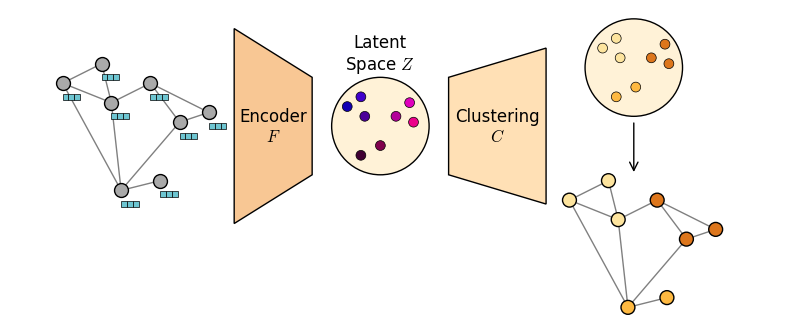

In [19]:
# DEEP GRAPH CLUSTERING FRAMEWORK
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, aspect="equal")

ax.set_xlim(-.15, 3.8)
ax.set_ylim(-.5, 1.1)
g = nx.Graph()
g.add_edges_from([
    (0, 1), (1, 2), (0, 2), (0, 3), (1, 3), (3, 4), (3, 5), (5, 6), (6, 7), (5, 7), (7, 1)
])
colors_by_clusters = ['#FDE49E'] * 3 + ['#FEB941'] * 2 + ['#DD761C'] * 3

pos = {
    0: (.2, 1),
    1: (.45, .9),
    2: (.4, 1.1),
    3: (.5, .45),
    4: (.7, .5),
    5: (.8, .8),
    6: (.95, .85),
    7: (.65, 1)
}
pos = {k : (v[0] - .08, v[1] - .28) for k, v in pos.items()}

nodes = nx.draw_networkx_nodes(g, pos, node_color="darkgray", node_size=100)
nodes.set_edgecolor('black')
nx.draw_networkx_edges(g, pos, edge_color='gray')
encoder = patches.Polygon([[1, 1], [1, 0], [1.4, .25], [1.4, .75]], closed=True, edgecolor='black', facecolor='#F8C794', linewidth=1)
plt.text(1.2, .5, "Encoder\n$F$", fontsize=12, ha='center', va='center', math_fontfamily="cm")
ax.add_patch(encoder)

latent_space = patches.Circle((1.75, .5), .25, edgecolor='black', facecolor='#FFF2D7', linewidth=1)
latent_pos = {0: (1.58, .6), 1: (1.65, .65), 2: (1.67, .55), 3: (1.65, .35), 4: (1.75, .4), 5: (1.9, .62), 6: (1.92, .52), 7: (1.83, .55)}
latent_color = [
    (.5 + 2.5 * (p[0] - 1.75), 0, .5 + 2 * (p[1] - .5)) for p in latent_pos.values()
]
encoded_nodes = nx.draw_networkx_nodes(g, latent_pos, node_color=latent_color, node_size=50) 
encoded_nodes.set_edgecolor('black')
encoded_nodes.set_linewidth(.5)
plt.text(1.75, .87, "Latent\nSpace $Z$", fontsize=12, ha='center', va='center', math_fontfamily="cm")
ax.add_patch(latent_space)

clustering = patches.Polygon([[2.1, .75], [2.1, .25], [2.6, .1], [2.6, .9]], closed=True, edgecolor='black', facecolor='#FFE0B5', linewidth=1)
plt.text(2.35, .5, "Clustering\n$C$", fontsize=12, ha='center', va='center', math_fontfamily="cm")
ax.add_patch(clustering)

clustered_latent = patches.Circle((3.05, .8), .25, edgecolor='black', facecolor='#FFF2D7', linewidth=1)
ax.add_patch(clustered_latent)
latent_pos = {k: (v[0] + 1.31, v[1] + .3) for k, v in latent_pos.items()}
encoded_nodes = nx.draw_networkx_nodes(g, latent_pos, node_color=colors_by_clusters, node_size=50)
encoded_nodes.set_edgecolor('black')
encoded_nodes.set_linewidth(.5)

arrow = patches.FancyArrowPatch((3.05, .53), (3.05, .25), arrowstyle='->', mutation_scale=15, color='black')
ax.add_patch(arrow)

# node features
for i in range(8):
    for j in range(3):
        ax.add_patch(patches.Rectangle((pos[i][0] - .0 + .03 * j, pos[i][1] - .085), .03, .03, edgecolor='black', facecolor="#6DC5D1", linewidth=.5))
    
pos = {k: (v[0] + 2.6, v[1] - .6) for k, v in pos.items()}
nodes = nx.draw_networkx_nodes(g, pos, node_color=colors_by_clusters, node_size=100)
nodes.set_edgecolor('black')
nx.draw_networkx_edges(g, pos, edge_color='gray')

plt.tight_layout()
plt.axis("off")
plt.savefig("figures/deep_framework.png", transparent=True, dpi=300)

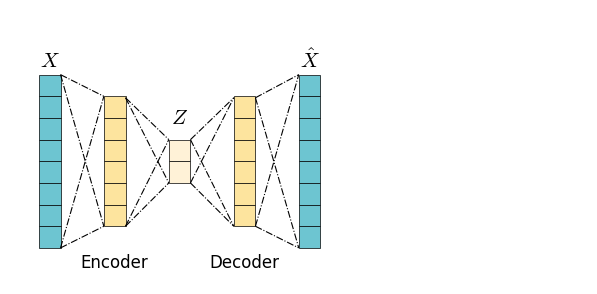

In [20]:
# AUTOENCODERS

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, aspect="equal")
ax.set_xlim(-.2, 3.8)
ax.set_ylim(-.8, 1.1)

input_vector_colors = ["#6DC5D1" for i in range(8)]

neuron_width = .15
layer_width = .3
tot_width = neuron_width + layer_width

#  input vector
for i in range(8):
    ax.add_patch(patches.Rectangle((0, .5 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
plt.text(.075, .75, "$X$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
    
# links
plt.plot([neuron_width, tot_width], [.65, .5], color='black', linestyle='-.', linewidth=.8)
plt.plot([neuron_width, tot_width], [-.55, -.4], color='black', linestyle='-.', linewidth=.8)
plt.plot([neuron_width, tot_width], [.65, -.4], color='black', linestyle='-.', linewidth=.8)
plt.plot([neuron_width, tot_width], [-.55, .5], color='black', linestyle='-.', linewidth=.8)

# first layer
for i in range(6):
    ax.add_patch(patches.Rectangle((tot_width, .35 - .15 * i), .15, .15, edgecolor='black', facecolor="#FDE49E", linewidth=.5))
    


plt.plot([tot_width + neuron_width, 2 * tot_width], [.49, .2], color='black', linestyle='-.', linewidth=.8)
plt.plot([tot_width + neuron_width, 2 * tot_width], [-.4, -.1], color='black', linestyle='-.', linewidth=.8)
plt.plot([tot_width + neuron_width, 2 * tot_width], [.49, -.1], color='black', linestyle='-.', linewidth=.8)
plt.plot([tot_width + neuron_width, 2 * tot_width], [-.4, .2], color='black', linestyle='-.', linewidth=.8)

# latent space
for i in range(2):
    ax.add_patch(patches.Rectangle((tot_width * 2, .05 - .15 * i), .15, .15, edgecolor='black', facecolor="#FFF2D7", linewidth=.5))
plt.text(2 * tot_width + neuron_width / 2, .35, "$Z$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
    
plt.plot([2 * tot_width + neuron_width, 3 * tot_width], [.2, .49], color='black', linestyle='-.', linewidth=.8)
plt.plot([2 * tot_width + neuron_width, 3 * tot_width], [-.1, -.4], color='black', linestyle='-.', linewidth=.8)
plt.plot([2 * tot_width + neuron_width, 3 * tot_width], [.2, -.4], color='black', linestyle='-.', linewidth=.8)
plt.plot([2 * tot_width + neuron_width, 3 * tot_width], [-.1, .49], color='black', linestyle='-.', linewidth=.8)

# second layer
for i in range(6):
    ax.add_patch(patches.Rectangle((tot_width * 3, .35 - .15 * i), .15, .15, edgecolor='black', facecolor="#FDE49E", linewidth=.5))
    
#links
plt.plot([3 * tot_width + neuron_width, 4 * tot_width], [.49, .65], color='black', linestyle='-.', linewidth=.8)
plt.plot([3 * tot_width + neuron_width, 4 * tot_width], [-.4, -.55], color='black', linestyle='-.', linewidth=.8)
plt.plot([3 * tot_width + neuron_width, 4 * tot_width], [.49, -.55], color='black', linestyle='-.', linewidth=.8)
plt.plot([3 * tot_width + neuron_width, 4 * tot_width], [-.4, .65], color='black', linestyle='-.', linewidth=.8)

# output vector
for i in range(8):
    ax.add_patch(patches.Rectangle((4 * tot_width, .5 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
    
plt.text(4 * tot_width + neuron_width / 2, .75, "$\hat{X}$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
plt.text(tot_width + neuron_width / 2, -.65, "Encoder", fontsize=12, ha='center', va='center', math_fontfamily="cm")
plt.text(3 * tot_width + neuron_width / 2, -.65, "Decoder", fontsize=12, ha='center', va='center', math_fontfamily="cm")

plt.axis("off")
plt.tight_layout()
plt.savefig("figures/autoencoder.png", transparent=True, dpi=300)

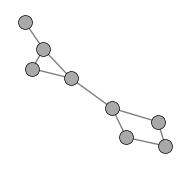

In [21]:
# random small graph
fig = plt.figure(figsize=(2, 1.8))
G = nx.erdos_renyi_graph(8, .47, seed=0)

pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color='darkgray', node_size=100)
nodes.set_edgecolor('black')
nodes.set_linewidth(.5)
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.tight_layout()
plt.axis("off")
plt.savefig("figures/small_graph.png", transparent=True, dpi=300)

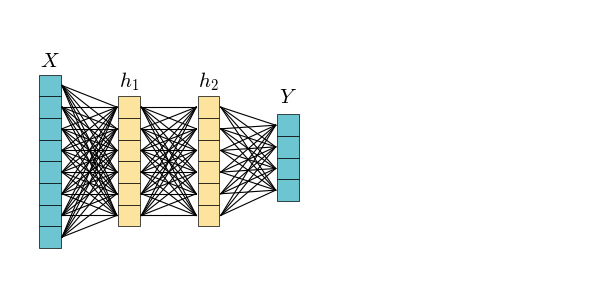

In [22]:
# NEURAL NETWORK

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, aspect="equal")

ax.set_xlim(-.2, 3.8)
ax.set_ylim(-.8, 1.1)

input_vector_colors = ["#6DC5D1" for i in range(8)]

neuron_width = .15
layer_width = .4
tot_width = neuron_width + layer_width

#  input vector
for i in range(8):
    ax.add_patch(patches.Rectangle((0, .5 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
    
plt.text(.075, .75, "$X$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

# links
for i in range(6):
    for j in range(8):
        plt.plot([neuron_width + .01, tot_width - .01], [.575 - .15 * j, .425 - .15 * i], color='black', linestyle='-', linewidth=.8)
        
# first layer
for i in range(6):
    ax.add_patch(patches.Rectangle((tot_width, .35 - .15 * i), .15, .15, edgecolor='black', facecolor="#FDE49E", linewidth=.5))
    
plt.text(tot_width + neuron_width / 2, .6, "$h_1$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

# links
for i in range(6):
    for j in range(6):
        plt.plot([tot_width + neuron_width + .01, 2 * tot_width - .01], [.425 - .15 * i, .425 - .15 * j], color='black', linestyle='-', linewidth=.8)
        
# second layer

for i in range(6):
    ax.add_patch(patches.Rectangle((tot_width * 2, .35 - .15 * i), .15, .15, edgecolor='black', facecolor="#FDE49E", linewidth=.5))
    
plt.text(2 * tot_width + neuron_width / 2, .6, "$h_2$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

# links
for i in range(6):
    for j in range(4):
        plt.plot([2 * tot_width + neuron_width + .01, 3 * tot_width - .01], [.425 - .15 * i, .3 - .15 * j], color='black', linestyle='-', linewidth=.8)
        
# output vector
for i in range(4):
    ax.add_patch(patches.Rectangle((3 * tot_width, .225 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
    
plt.text(3 * tot_width + neuron_width / 2, .5, "$Y$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

plt.axis("off")
plt.tight_layout()
plt.savefig("figures/neural_network.png", transparent=True, dpi=300)

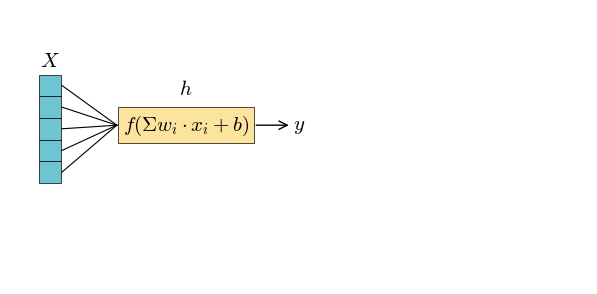

In [23]:
# single neuron

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, aspect="equal")

ax.set_xlim(-.2, 3.8)
ax.set_ylim(-.8, 1.1)

input_vector_colors = ["#6DC5D1" for i in range(8)]

neuron_width = .15
layer_width = .4
tot_width = neuron_width + layer_width

#  input vector

for i in range(5):
    ax.add_patch(patches.Rectangle((0, .5 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
    
plt.text(.075, .75, "$X$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
    
# links

for i in range(5):
    plt.plot([neuron_width + .01, tot_width - .01], [.575 - .15 * i, .3], color='black', linestyle='-', linewidth=.8)
    
# single neuron

ax.add_patch(patches.Rectangle((tot_width, .175), .94, .25, edgecolor='black', facecolor="#FDE49E", linewidth=.5))

plt.text(tot_width + .47, .55, "$h$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
# linear operation
plt.text(tot_width + .47, .3, "$f(\\Sigma w_i\\cdot x_i + b)$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

ax.add_patch(patches.FancyArrowPatch((tot_width + .936, .3), (tot_width + 1.2, .3), arrowstyle='->', mutation_scale=15, color='black'))
plt.text(tot_width + 1.25, .3, "$y$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

plt.axis("off")
plt.tight_layout()
plt.savefig("figures/neuron.png", transparent=True, dpi=300)